<a href="https://colab.research.google.com/github/ratnakandala/Topic-Modelling/blob/main/Topic_Modeling_(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#Importing NLTK modules
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud, STOPWORDS

#Installing gensim and pyLDAvis
!pip install gensim

#Importing gensim and pyLDAvis
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis

# Enabling pyLDAvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
pwd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content'

In [39]:
file_path = r"NLP Analysis Data.csv"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#Verifying if the file exists at the specified path
assert os.path.exists(file_path), 'Data file not found!'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
ds = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
#Filter texts containing the word "happy"
happy_sentences = ds[ds['Text'].str.contains("happy", case = False)]['Text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### PREPROCESSING THE SENTENCES WITH THE WORD "HAPPY"

In [43]:
#Defining Stop Words
stop_words = set(stopwords.words('english'))

#Defining proprocessing function
def preprocess(Text):
  list_of_tokens = word_tokenize(Text.lower())
  list_of_tokens = [word for word in list_of_tokens if word is not None and word.isalnum() and word not in stop_words]
  return list_of_tokens

#Apply the function to the Text with 'happy'
tokenized_sentences = happy_sentences.apply(preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#Creating a flattened list of tokenized_sentences (which is a list of lists)
flattened_list = sum(tokenized_sentences, [])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
#representing dictionary as documents
dictionary = corpora.Dictionary(tokenized_sentences)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
#CREATE CORPUS FOR LDA:
corpus = [dictionary.doc2bow(sentences) for sentences in tokenized_sentences]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
#Printing 10 words from the text corpus
subset_dict = [[(dictionary[id], freq) for id, freq in cor] for cor in corpus[:2]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
#Defining the Latent Dirichlet Allocation (LDA) model
from gensim.models import LdaModel
num_topics = 4
model = LdaModel(corpus = corpus, num_topics=num_topics, id2word = dictionary, passes=10, random_state = 100, update_every = 1, chunksize = 100, alpha = 'symmetric', eta = 0.6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
#printing the key words in the  num_topics
topics = model.print_topics(num_words=10)

for id, topic in topics:
  print(f"Topic {id}: {topic}")

Topic 0: 0.003*"code" + 0.003*"podcast" + 0.003*"video" + 0.003*"traffic" + 0.003*"goofing" + 0.002*"distracting" + 0.002*"sensor" + 0.002*"regrets" + 0.002*"reintroduced" + 0.002*"outlet"
Topic 1: 0.021*"happy" + 0.018*"prompt" + 0.010*"time" + 0.010*"feeling" + 0.009*"felt" + 0.009*"got" + 0.008*"class" + 0.008*"could" + 0.008*"get" + 0.008*"work"
Topic 2: 0.007*"research" + 0.006*"asked" + 0.005*"told" + 0.003*"team" + 0.003*"microeconomics" + 0.003*"emma" + 0.002*"wife" + 0.002*"kamal" + 0.002*"years" + 0.002*"university"
Topic 3: 0.006*"stwest" + 0.005*"diwali" + 0.005*"protein" + 0.004*"cook" + 0.004*"shopping" + 0.004*"kitchen" + 0.004*"km" + 0.004*"popup" + 0.003*"pizza" + 0.003*"chicken"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#Visualize the topics
#Preparing the pyLDAvis visualization
vis = gensimvis.prepare(model, corpus, dictionary, sort_topics = False)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


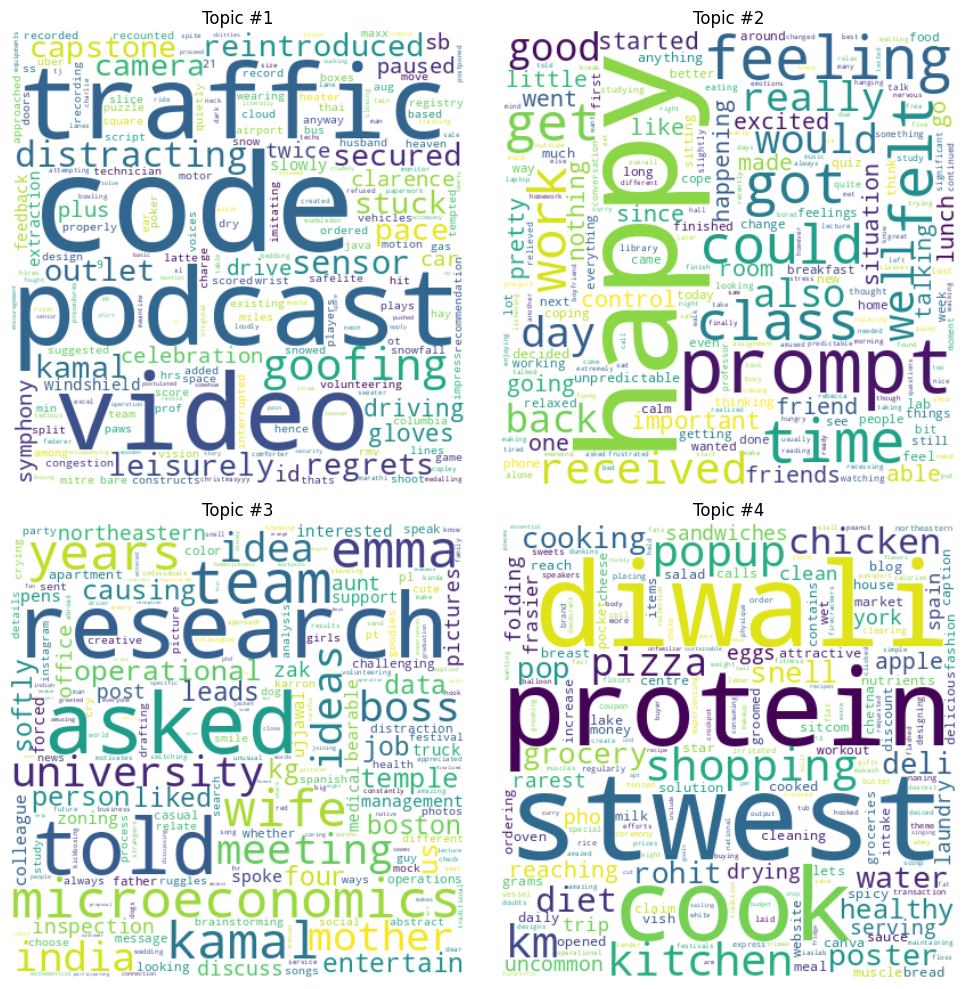

In [51]:
#Generate word clouds for each topic

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i,ax in enumerate(axes.flatten()):
    topic_num = i+1
    wc = WordCloud(width=400, height=400, background_color='white').fit_words(dict(model.show_topic(i, 200)))
    ax.imshow(wc, interpolation = 'bilinear')
    ax.axis("off")
    ax.set_title("Topic #" + str(topic_num))
plt.tight_layout()
plt.show()

In [52]:
#Calculating Perplexity Score and Coherence Score

perp = model.log_perplexity(corpus)
print('The Perplexity Score is:', perp)

from gensim.models import CoherenceModel
coh_model = CoherenceModel(model = model, texts = tokenized_sentences, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coh_model.get_coherence()
print('The Coherence Score is:', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The Perplexity Score is: -7.446559453725081
The Coherence Score is: 0.4265908579488796
